In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

CustomerId -	Customer Identification Number

Surname -	Customer's Last Name

CreditScore - 	Credit Score

Geography - 	Geographic Location (Region of the customer)

Gender -	Gender

Age -	Age

Tenure -	Tenure (Duration of time with the bank)

Balance - 	Account Balance

NumOfProducts - 	Number of Products Owned by the Customer

HasCrCard - 	Has Credit Card Presence

IsActiveMember - 	Active Membership Status

EstimatedSalary - 	Estimated Salary

Exited - 	Churned Customer (1: Churned, 0: Not churned)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<BarContainer object of 2 artists>

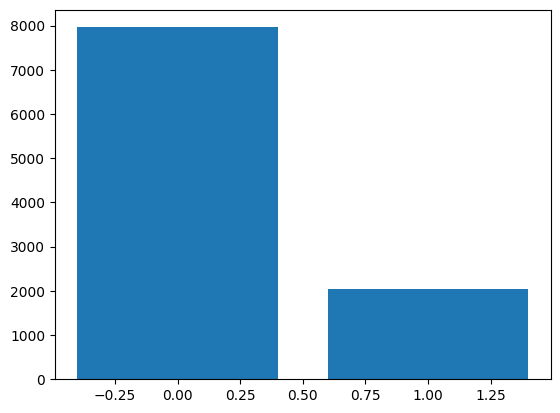

In [ ]:
value_counts = df['Exited'].value_counts()

plt.bar(value_counts.index, value_counts.values)

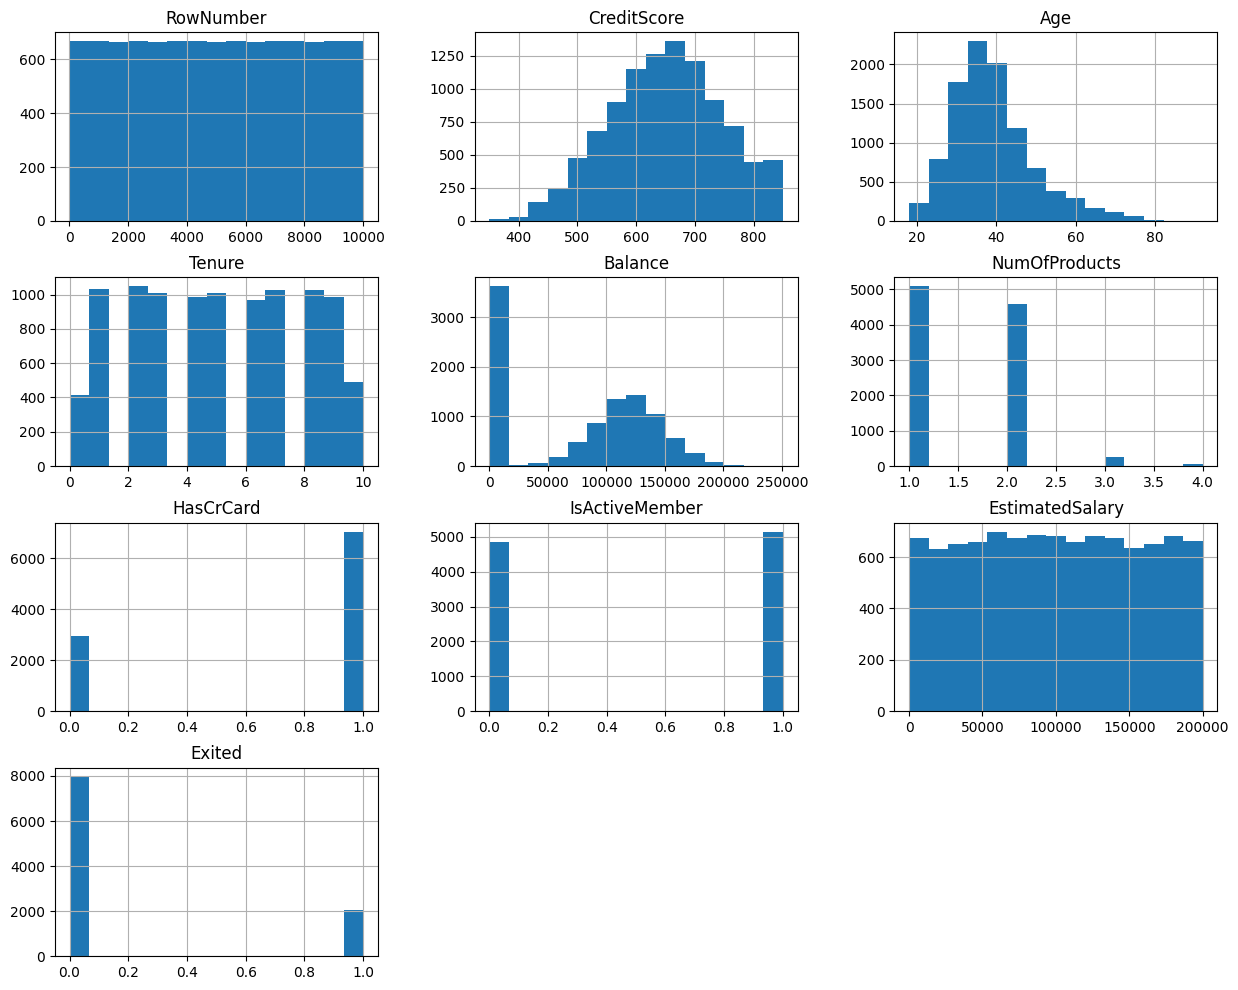

In [ ]:
df.hist(figsize=(15, 12), bins=15);

<Axes: >

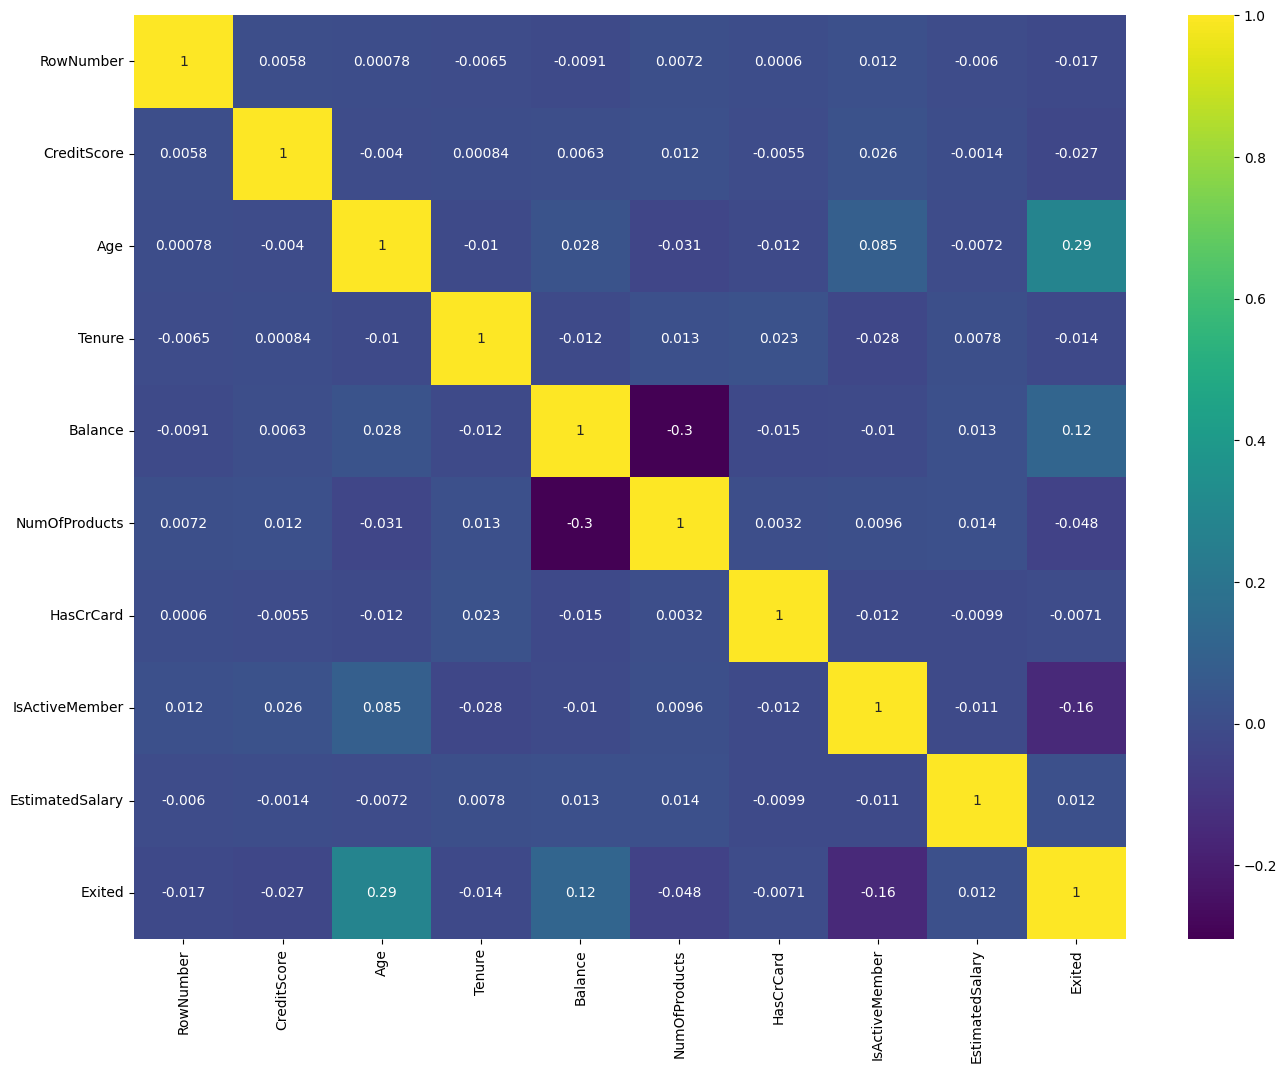

In [ ]:
numerical_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(16, 12))
sns.heatmap(numerical_df.corr(), annot=True, cmap='viridis')

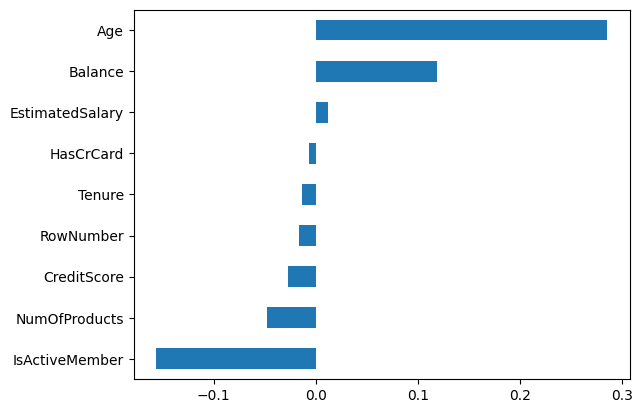

In [ ]:
numerical_df = df.select_dtypes(include=[np.number])
correlation_series = numerical_df.corr()['Exited'][:-1].sort_values()
correlation_series.plot.barh();

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,3,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(9000, 12)

In [ ]:
model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.002)
model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=90)

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=500,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/500
254/254 [==============================] - 6s 9ms/step - loss: 0.5310 - recall: 0.2125 - val_loss: 0.4653 - val_recall: 0.0000e+00
Epoch 2/500
254/254 [==============================] - 1s 4ms/step - loss: 0.4339 - recall: 0.2082 - val_loss: 0.3615 - val_recall: 0.3481
Epoch 3/500
254/254 [==============================] - 1s 4ms/step - loss: 0.3940 - recall: 0.3426 - val_loss: 0.3297 - val_recall: 0.4641
Epoch 4/500
254/254 [==============================] - 1s 4ms/step - loss: 0.3802 - recall: 0.3717 - val_loss: 0.3164 - val_recall: 0.4972
Epoch 5/500
254/254 [==============================] - 1s 4ms/step - loss: 0.3740 - recall: 0.3898 - val_loss: 0.3220 - val_recall: 0.4807
Epoch 6/500
254/254 [==============================] - 1s 4ms/step - loss: 0.3633 - recall: 0.4128 - val_loss: 0.3176 - val_recall: 0.5304
Epoch 7/500
254/254 [==============================] - 1s 4ms/step - loss: 0.3661 - recall: 0.4286 - val_loss: 0.3051 - val_recall: 0.5635
Epoch 8/500
254/254 [==

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                832       
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_2 (Bat  (None, 16)               

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.531027,0.212470,0.465287,0.000000
1,0.433897,0.208232,0.361504,0.348066
2,0.393996,0.342615,0.329710,0.464088
3,0.380175,0.371671,0.316387,0.497238
4,0.374021,0.389830,0.321985,0.480663


In [ ]:
model.history.history

{'loss': [0.5310266017913818,
  0.4338968098163605,
  0.39399614930152893,
  0.3801748752593994,
  0.3740208148956299,
  0.36333921551704407,
  0.3661212623119354,
  0.3623252511024475,
  0.36038899421691895,
  0.3557281196117401,
  0.3540644943714142,
  0.3524506092071533,
  0.35410016775131226,
  0.3528832495212555,
  0.34882405400276184,
  0.35196012258529663,
  0.342842161655426,
  0.3447718918323517,
  0.3449035584926605,
  0.3395749628543854,
  0.33679431676864624,
  0.3391028642654419,
  0.34097012877464294,
  0.3402805030345917,
  0.3366393446922302,
  0.34015464782714844,
  0.32993414998054504,
  0.33317163586616516,
  0.3354562520980835,
  0.3317018747329712,
  0.33436352014541626,
  0.3317086398601532,
  0.3318510353565216,
  0.3294527530670166,
  0.3279774487018585,
  0.33061522245407104,
  0.32851576805114746,
  0.3217771649360657,
  0.3290334939956665,
  0.32351675629615784,
  0.3206385374069214,
  0.3235173523426056,
  0.3172988295555115,
  0.31821364164352417,
  0.32060

In [ ]:
loss_df.shape

(129, 4)

<Axes: >

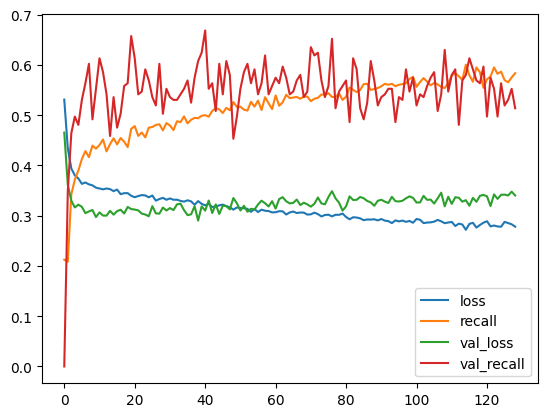

In [ ]:
loss_df.plot()

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[756  40]
 [119  85]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       796
           1       0.68      0.42      0.52       204

    accuracy                           0.84      1000
   macro avg       0.77      0.68      0.71      1000
weighted avg       0.83      0.84      0.83      1000



32/32 [==============================] - 0s 2ms/step


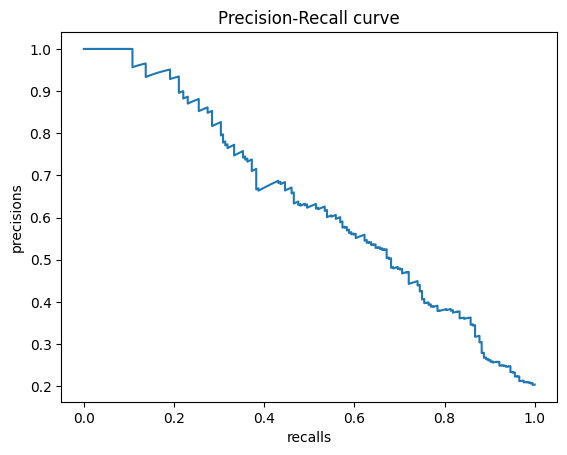

In [ ]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.6356706280802547